In [42]:
from shapely import geometry
import math
import matplotlib.pyplot as plt

In [63]:
coordinates = [[53.31960, 6.81197], [53.31961, 6.81205], [53.31968, 6.81202], [53.31967, 6.81194], [53.31960, 6.81197]]

In [64]:
polygon = geometry.Polygon(coordinates)

In [67]:
list(polygon.centroid.coords[0])

[53.31964, 6.811994999999998]

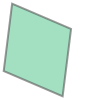

In [66]:
polygon

In [73]:
%%time
center = [53.31964, 6.811994999999998]
coordinates = [[53.31960, 6.81197], [53.31961, 6.81205], [53.31968, 6.81202], [53.31967, 6.81194], [53.31960, 6.81197]]
# in kilometers??
d = 10/1000
r_earth = 6378

new_cs = []

for coord in coordinates:
    # point above or under center:
    if coord[0] > center[0]:
        new_latitude  = coord[0]  + (d / r_earth) * (180 / math.pi);
    else:
        new_latitude  = coord[0]  - (d / r_earth) * (180 / math.pi);
    
    # point left or right center
    if coord[1] > center[1]:
        new_longitude = coord[1] + (d / r_earth) * (180 / math.pi) / math.cos(coord[0] * math.pi/180);
    else:
        new_longitude = coord[1] - (d / r_earth) * (180 / math.pi) / math.cos(coord[0] * math.pi/180);
        
    new_cs.append([new_latitude, new_longitude])

Wall time: 0 ns


In [74]:
polygon2 = geometry.Polygon(new_cs)

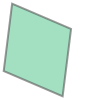

In [75]:
polygon

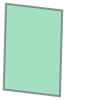

In [76]:
polygon2

array('d', [53.3196, 53.31961, 53.31968, 53.31967, 53.3196]) array('d', [6.81197, 6.81205, 6.81202, 6.81194, 6.81197])


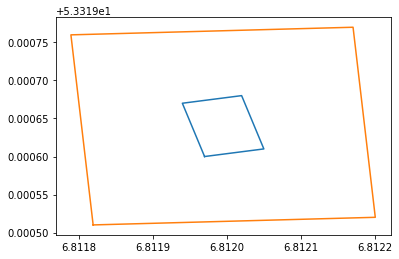

In [82]:
x,y = polygon.exterior.xy
l,k = polygon2.exterior.xy
print(x,y)

plt.plot(y,x)
plt.plot(k,l)

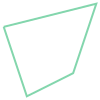

In [62]:
polygon.exterior

In [ ]:
known_point = [53.31960, 6.81197]
center = [53.31964, 6.811994999999998]
d = 10/1000
r_earth = 6378
d_latitude = (d / r_earth) * (180 / math.pi)
d_longitude = (d / r_earth) * (180 / math.pi) / math.cos(coord[0] * math.pi/180)



In [92]:
import pyclipper

subj = ((2,1), (4,2), (2,3))

pco = pyclipper.PyclipperOffset()
pco.AddPath(subj, pyclipper.JT_ROUND, pyclipper.ET_CLOSEDPOLYGON)
pco.Execute(-7.0)

[]

In [54]:
import pandas as pd
import pyclipper
import numpy as np
from ast import literal_eval


pand_id = 363300000002529.0

df          = pd.read_csv('../data/test.csv')
building    = df[df['ruimte_id'] == pand_id].iloc[0]
coordinates = building['WGS']
coordinates = np.array(literal_eval(coordinates))

print(coordinates[:,0].min())
print(coordinates[:,0].max())

print(coordinates[:,1].min())
print(coordinates[:,1].max())

52.37807710358412
52.37825337269062
4.883422987270737
4.883649431675575
